# **Regression Analysis using CRISP-DM**

## 1. Business Understanding
---

### Objectives of the Analysis

The analysis aims to achieve the following objectives:
- Forecasting transactions over time
- Data limited to 3 years
- They advised data quality is okay, but could be better



### Criteria for Success
The success of the analysis will be measured based on:
- Accurate forecast of transactions with a tolerable margin of overestimation.
- Predictions that are actionable.
- A model that outperforms existing baseline forecasts or historical averages.
- Stakeholder trust in the model’s outputs for decision-making.
- A model that maintains accuracy and relevance over time with new data.


## 2. Data Understanding

---

### Initial Data Exploration
- Use the head() method to view the first few rows of the dataset.
- Use the info() method to understand the data types and non-null counts.
- Use the describe() method to get a statistical summary of the dataset.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./regression.csv')

In [3]:
# show first part of the dataset
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [4]:
# show last part of the dataset
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000


In [5]:
# check for dtypes and null values that would need to be handled.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [6]:
#loop through all columns to see unqiue values across the df
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())


Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [7]:
df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


### Visualizations
- Create a histogram or a kernel density estimate (KDE) plot to see the distribution of the target variable (call volume).
- Generate a correlation heatmap to identify how features relate to each other.
- Produce pair plots or scatter plots to visualize important relationships between features and the target variable.
- Use box plots to examine the distributions of various features and identify outliers.

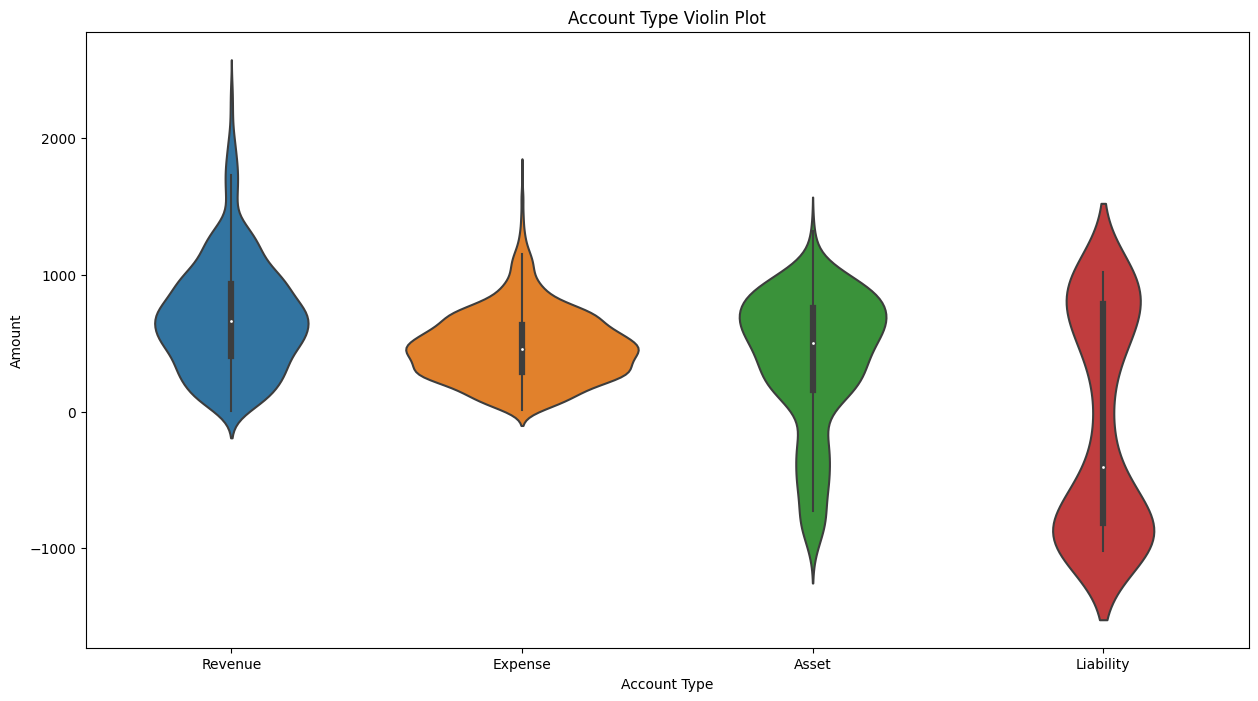

In [8]:
plt.figure(figsize=(15,8))
sns.violinplot(x='Account Type', y= 'Amount', data = df).set_title('Account Type Violin Plot')
plt.show()

The account that is the furthest from a normal distribution, Liability, should be investigated further. 

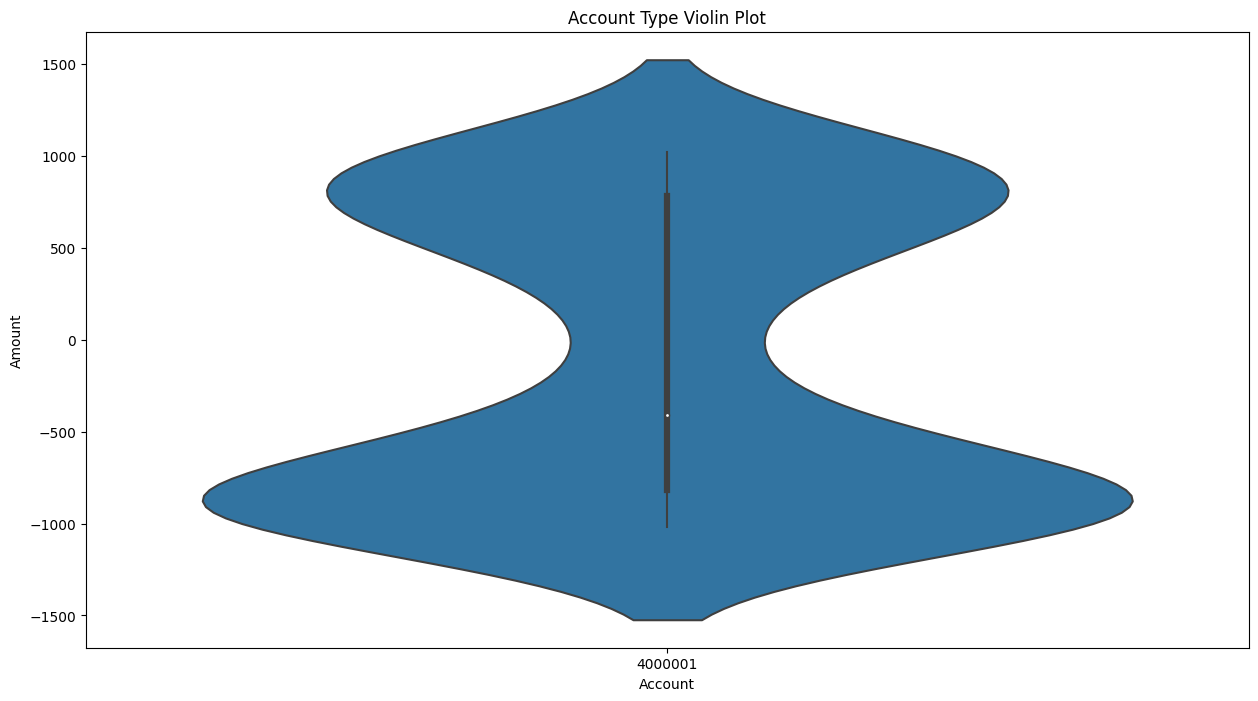

In [9]:
plt.figure(figsize=(15,8))
sns.violinplot(x='Account', y= 'Amount', data = df[df['Account Type']=='Liability']).set_title('Account Type Violin Plot')
plt.show()

It appears that the liability type is comprised of only one account causing the bimodal distribution. 

In [10]:
#change the month column into a number so we can string it with the year and 1st of the month to create a date to track trends. 
monthmap = {'Jan':'1',
            'Feb':'2',
            'Mar':'3',
            'Apr':'4',
            'May':'5',
            'Jun':'6',
            'Jul':'7',
            'Aug':'8',
            'Sep':'9',
            'Oct':'10',
            'Nov':'11',
            'Dec':'12'}

df['Period'] = df['Month'].apply(lambda x: monthmap[x])
df['Day'] = 1

#create date column and change to datetime
df['Date'] = df['Year'].astype(str) + '-' + df['Period'].astype(str)+ '-' + df['Day'].astype(str)
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year                 4212 non-null   int64         
 1   Month                4212 non-null   object        
 2   Cost Centre          4212 non-null   object        
 3   Account              4212 non-null   int64         
 4   Account Description  4212 non-null   object        
 5   Account Type         4212 non-null   object        
 6   Amount               4212 non-null   float64       
 7   Period               4212 non-null   object        
 8   Day                  4212 non-null   int64         
 9   Date                 4212 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 329.2+ KB


### Trends

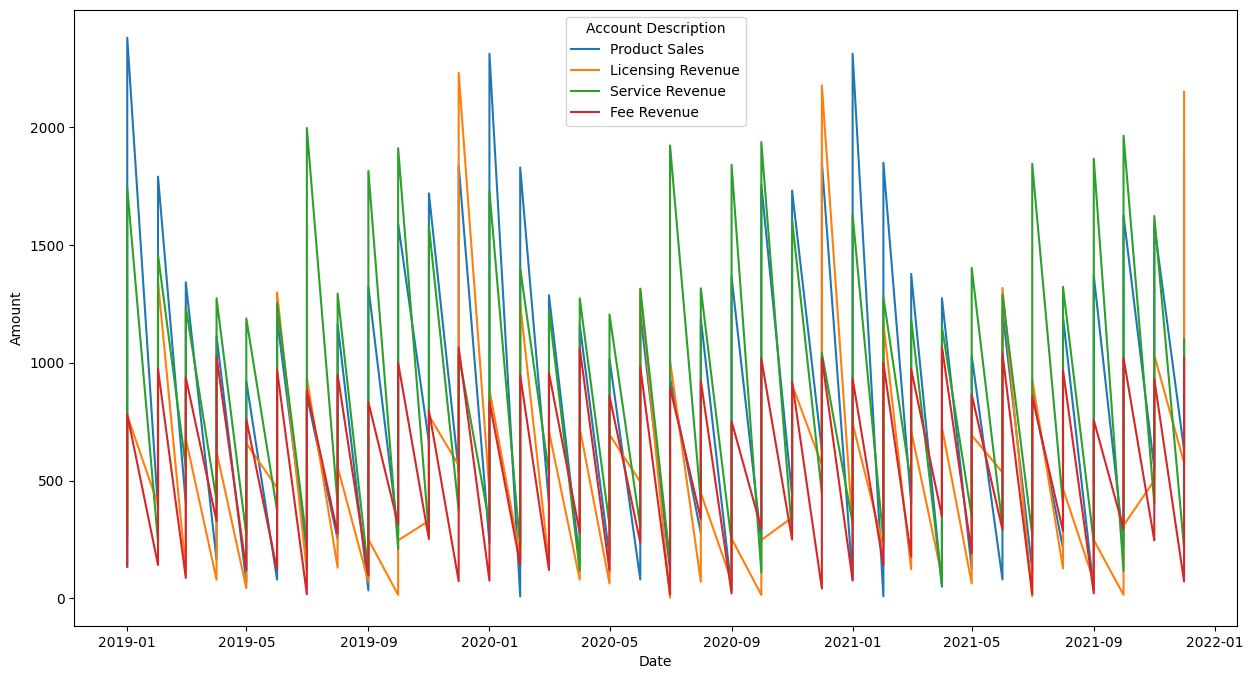

In [12]:
# visualize Product Sales for sseasonality
plt.figure(figsize=(15,8))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Type']== 'Revenue']).set_title
('Seasonal Sales')
plt.show()

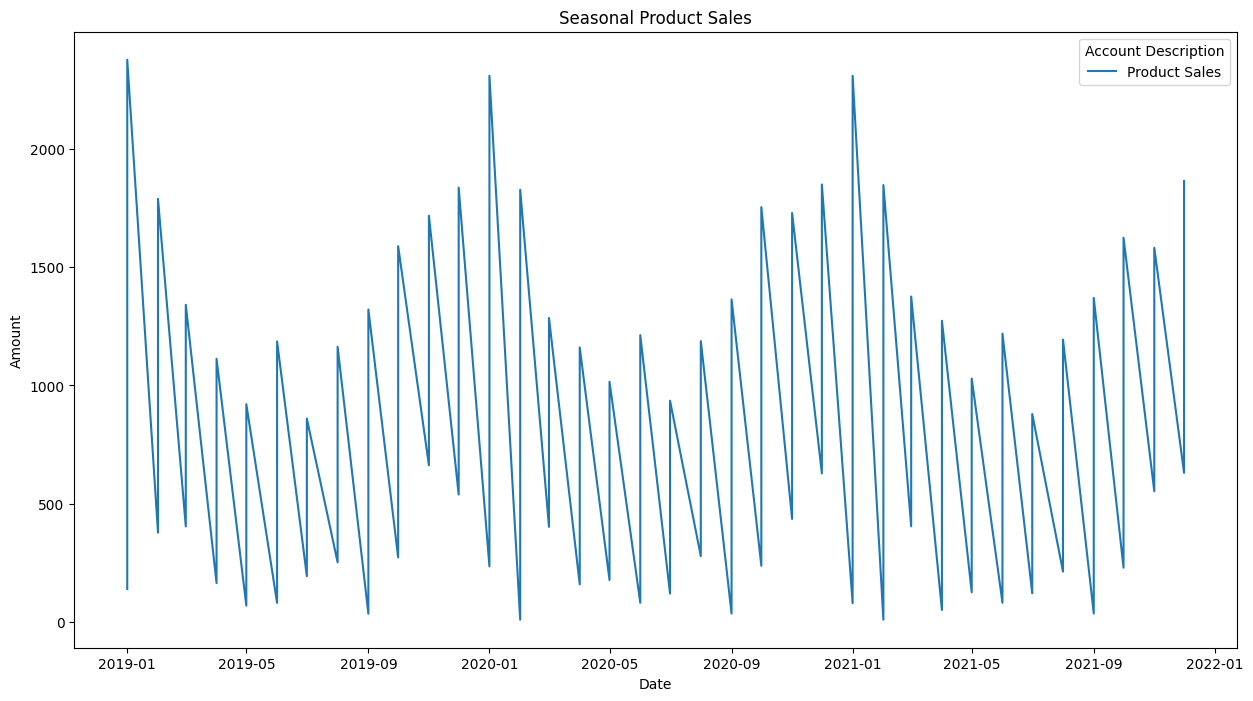

In [13]:
# visualize Product Sales for sseasonality
plt.figure(figsize=(15,8))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description']== 'Product Sales']).set_title('Seasonal Product Sales')
plt.show()

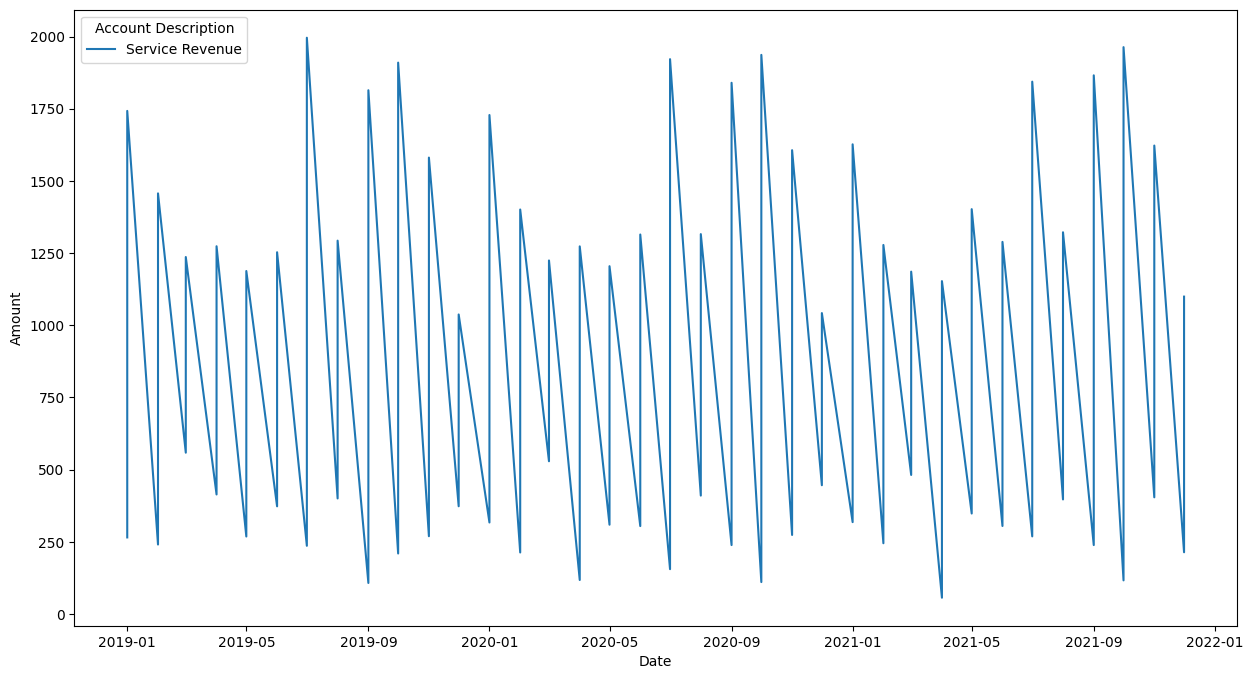

In [14]:
# visualize Service Revenue for sseasonality
plt.figure(figsize=(15,8))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description']== 'Service Revenue']).set_title
('Seasonal Service Revenue')
plt.show()

#### Correlation

we'd like to visualize the correlation of each account to the other accounts. 

In [15]:
df.corr()

C:\Users\ntann\AppData\Local\Temp\ipykernel_23864\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Account,Amount,Day
Year,1.000000e+00,-5.466737e-15,0.014750,NaN
Account,-5.466737e-15,1.000000e+00,-0.417946,NaN
Amount,1.475040e-02,-4.179456e-01,1.000000,NaN
Day,NaN,NaN,NaN,NaN


In [16]:
# One hot encode the Account column so each account is represented. Then loop through the dataframe to replace the ones with the amount for each of the new columns. This should allow us to look at correlation by account. 

corrdict = {}
for key, row in df.join(pd.get_dummies(df['Account'])).iterrows():
    corrdict[key] = {int(row['Account']):row['Amount']}

corr_df = pd.DataFrame.from_dict(corrdict).T.fillna(0)

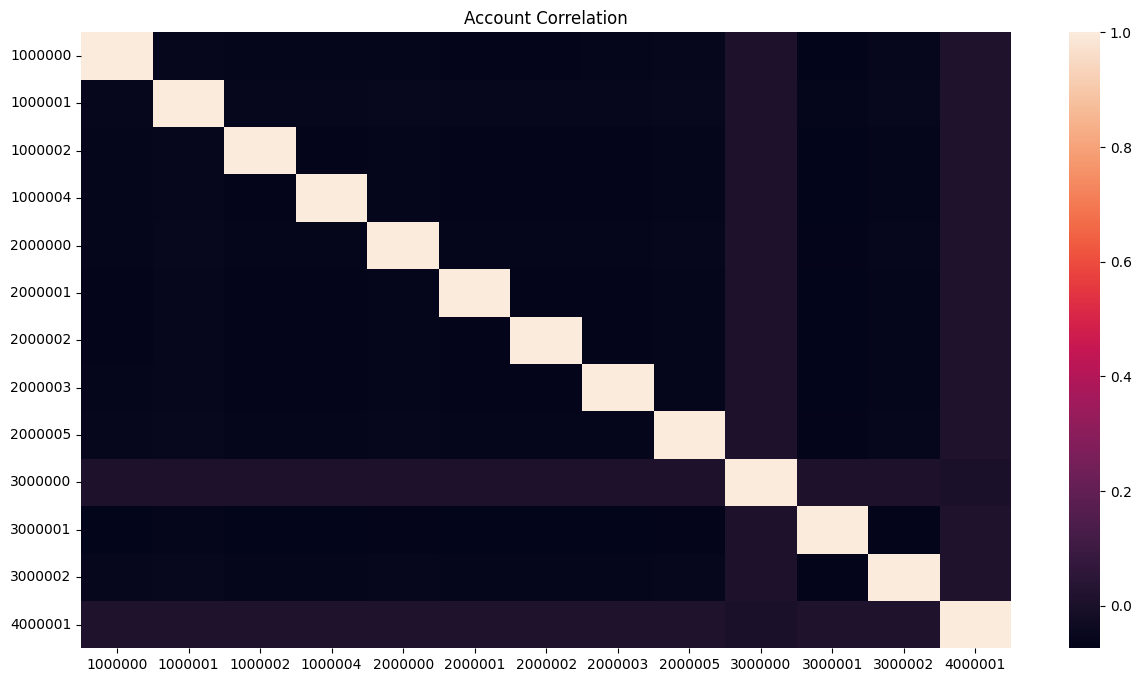

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_df.corr()).set_title('Account Correlation')
plt.show()

In [18]:
df[df['Account'] ==3000000]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
9,2019,Jan,CC100,3000000,Cash at Bank,Asset,476.713,1,1,2019-01-01
22,2019,Jan,CC101,3000000,Cash at Bank,Asset,464.197,1,1,2019-01-01
35,2019,Jan,CC102,3000000,Cash at Bank,Asset,-296.261,1,1,2019-01-01
48,2019,Jan,CC200,3000000,Cash at Bank,Asset,750.000,1,1,2019-01-01
61,2019,Jan,CC201,3000000,Cash at Bank,Asset,187.647,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4156,2021,Dec,CC201,3000000,Cash at Bank,Asset,413.616,12,1,2021-12-01
4169,2021,Dec,CC202,3000000,Cash at Bank,Asset,375.657,12,1,2021-12-01
4182,2021,Dec,CC300,3000000,Cash at Bank,Asset,-492.546,12,1,2021-12-01
4195,2021,Dec,CC301,3000000,Cash at Bank,Asset,-579.986,12,1,2021-12-01


In [19]:
df[df['Account'] ==4000001]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
12,2019,Jan,CC100,4000001,Accounts Payable,Liability,980.0,1,1,2019-01-01
25,2019,Jan,CC101,4000001,Accounts Payable,Liability,200.0,1,1,2019-01-01
38,2019,Jan,CC102,4000001,Accounts Payable,Liability,-980.0,1,1,2019-01-01
51,2019,Jan,CC200,4000001,Accounts Payable,Liability,980.0,1,1,2019-01-01
64,2019,Jan,CC201,4000001,Accounts Payable,Liability,784.0,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4159,2021,Dec,CC201,4000001,Accounts Payable,Liability,804.0,12,1,2021-12-01
4172,2021,Dec,CC202,4000001,Accounts Payable,Liability,-1018.0,12,1,2021-12-01
4185,2021,Dec,CC300,4000001,Accounts Payable,Liability,-1020.0,12,1,2021-12-01
4198,2021,Dec,CC301,4000001,Accounts Payable,Liability,-612.0,12,1,2021-12-01


## 3. Data Preparation

- For the third phase of CRISP-DM, we'll be preparing the data for modeling.  

---



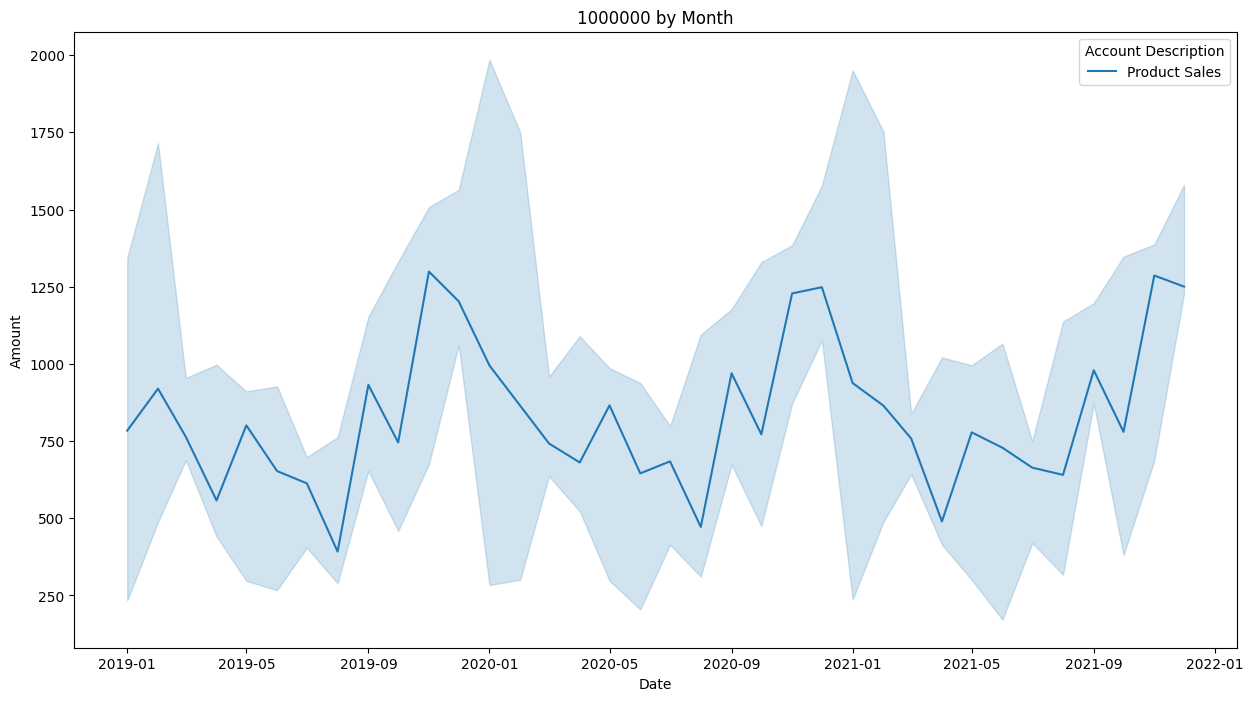

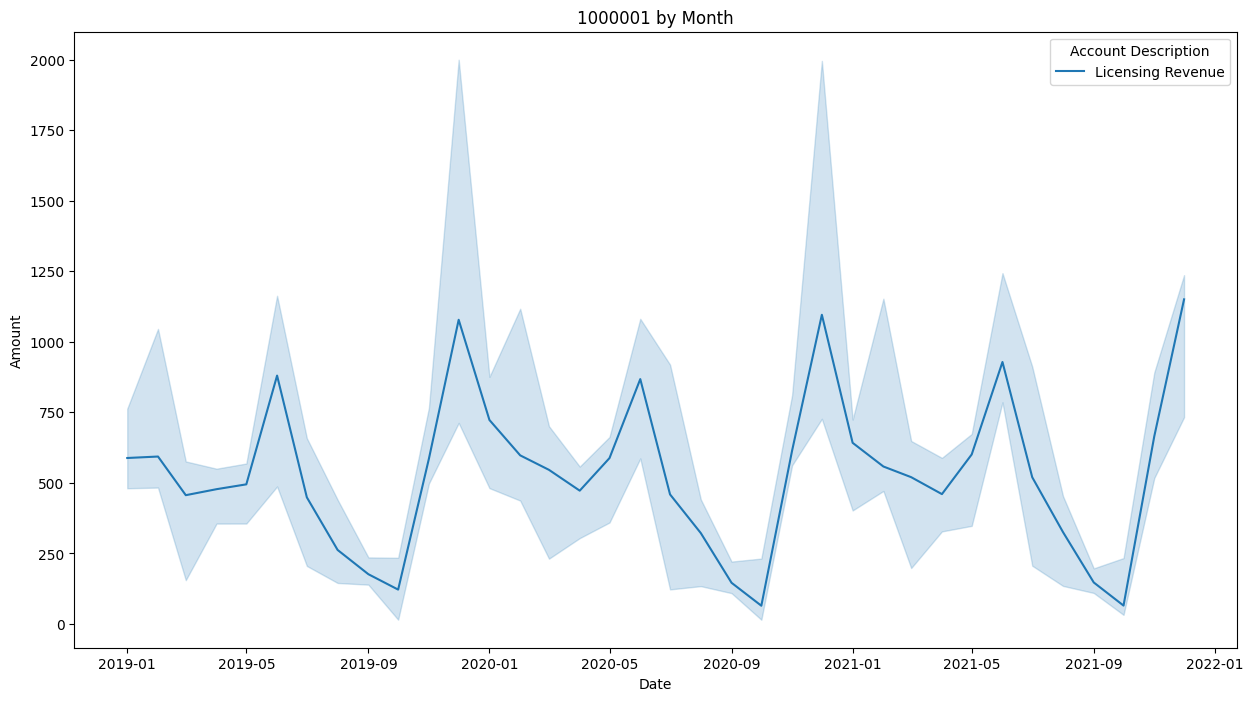

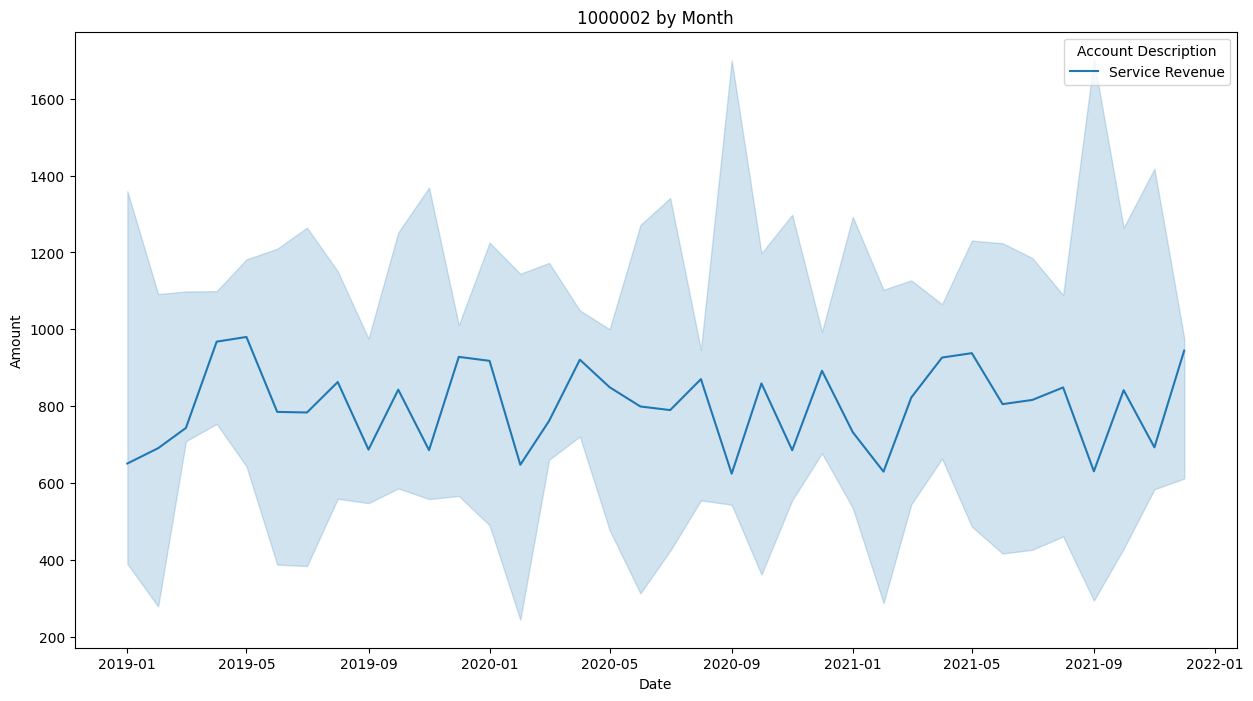

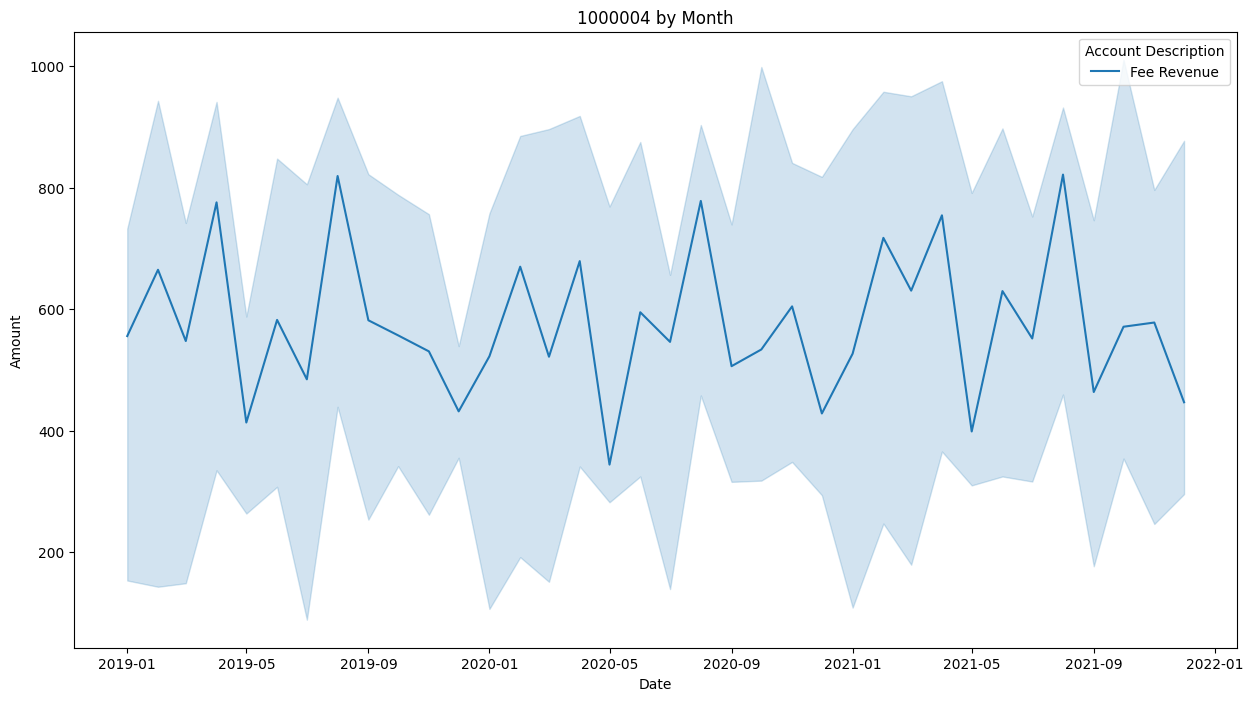

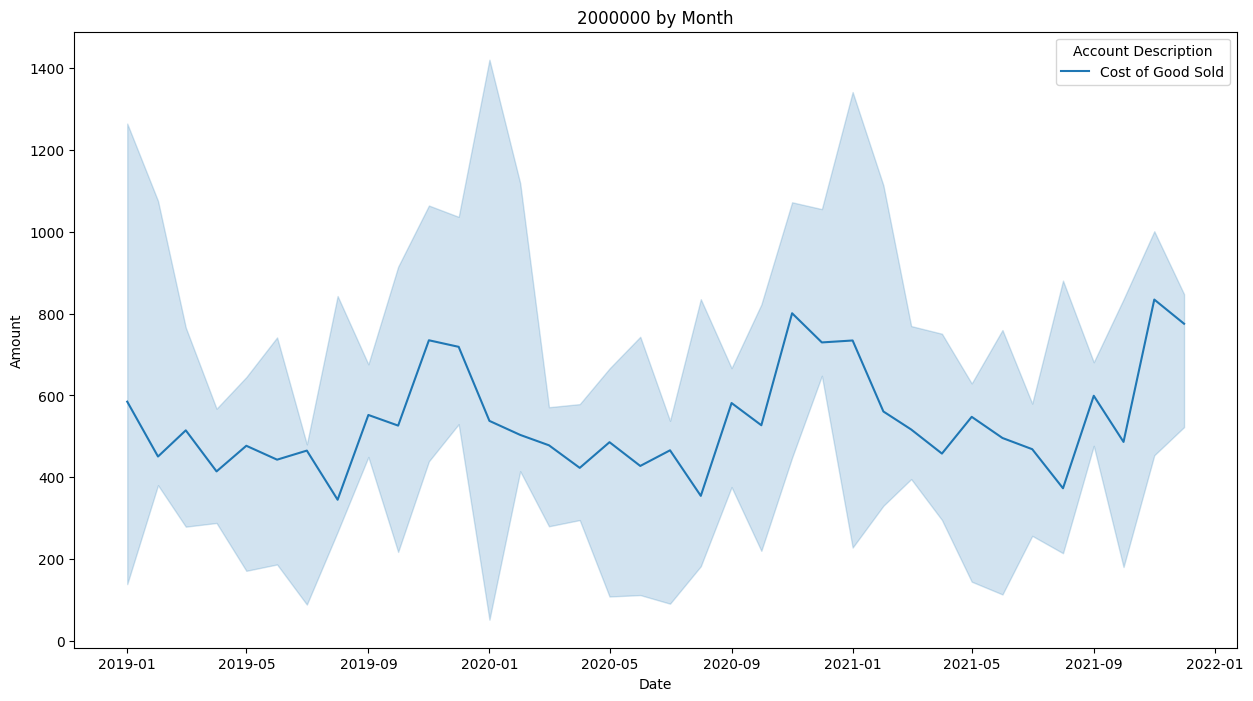

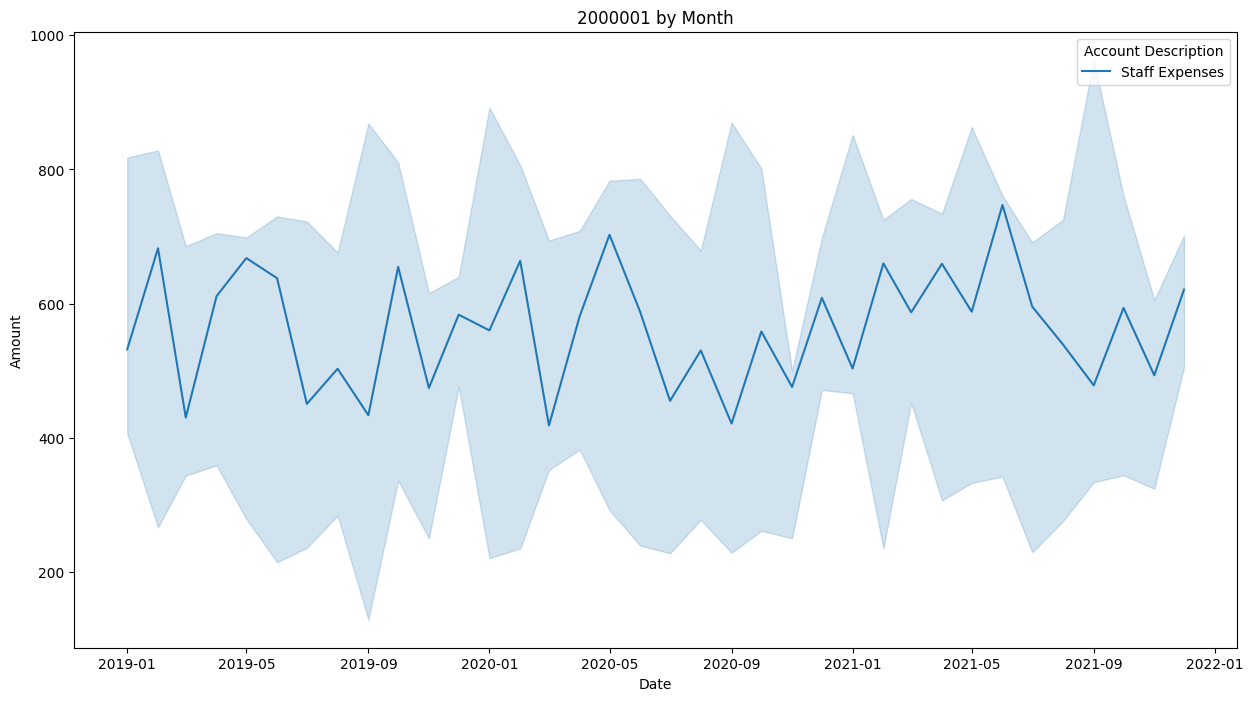

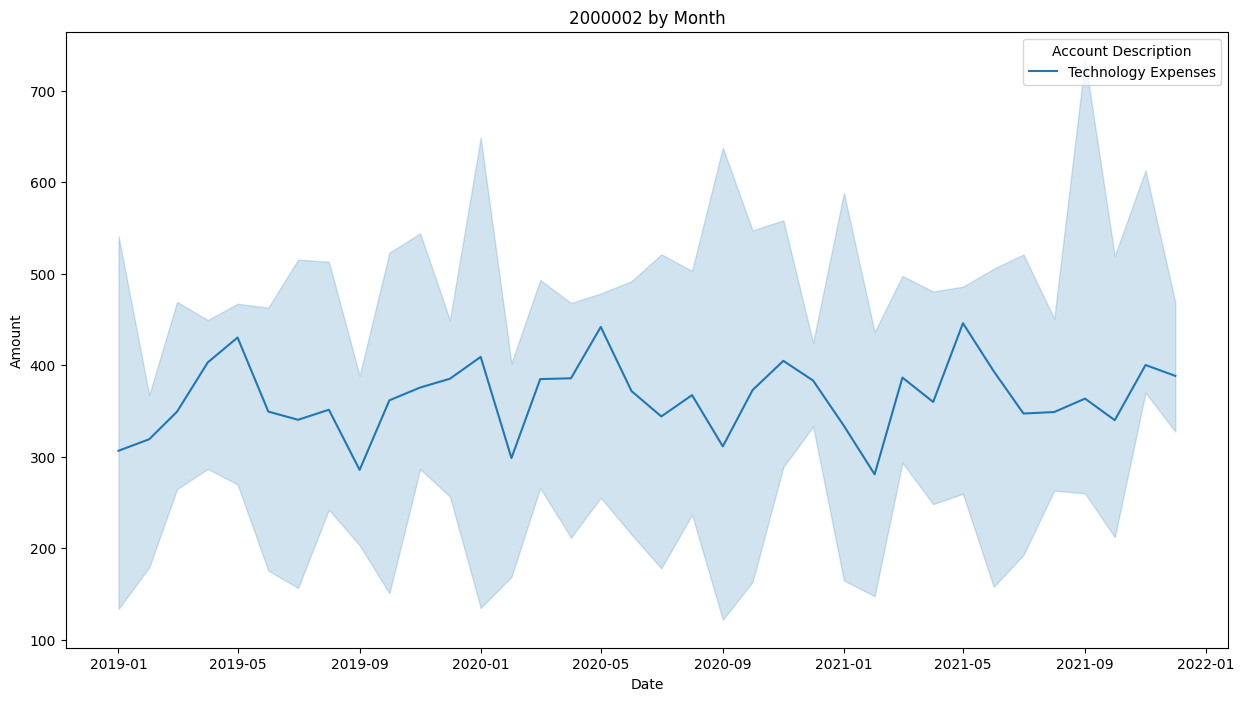

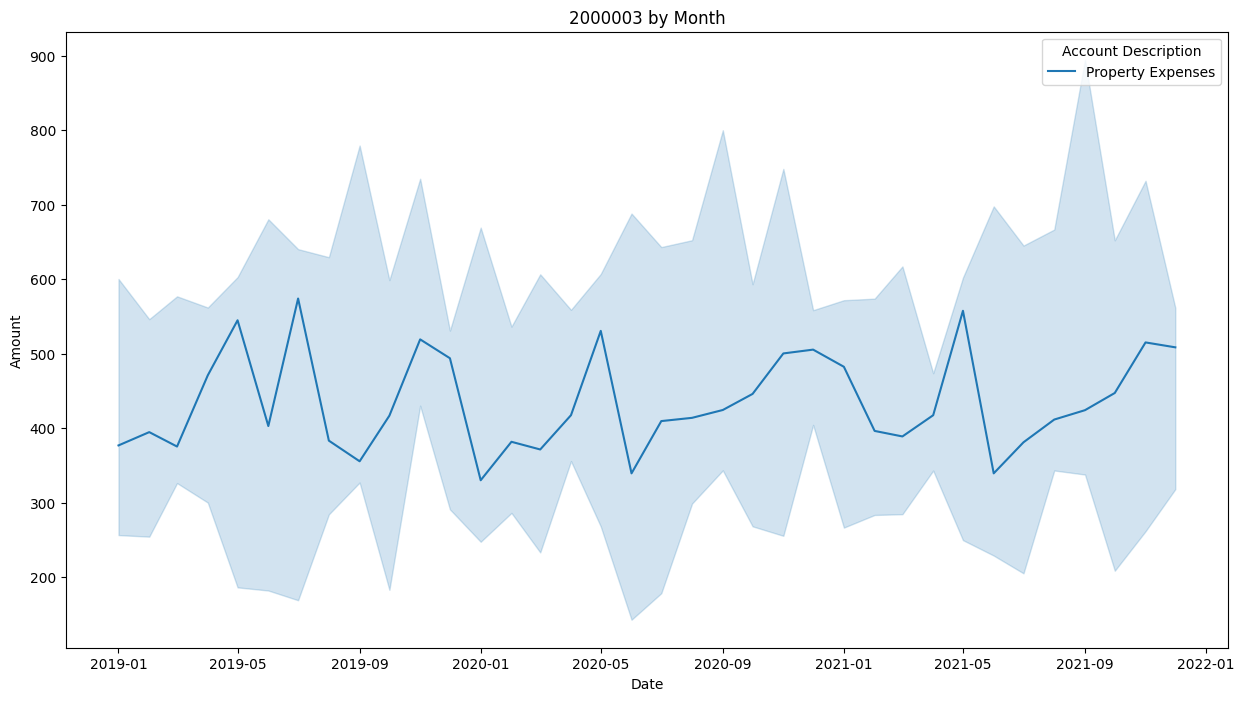

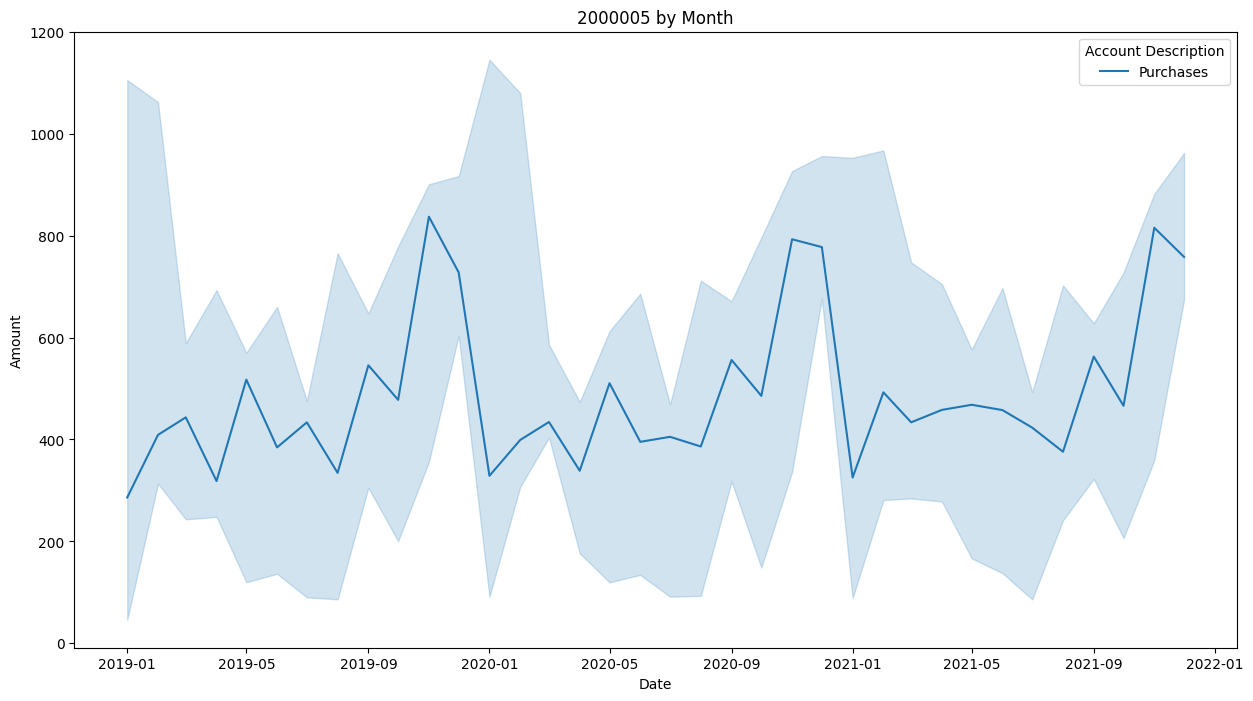

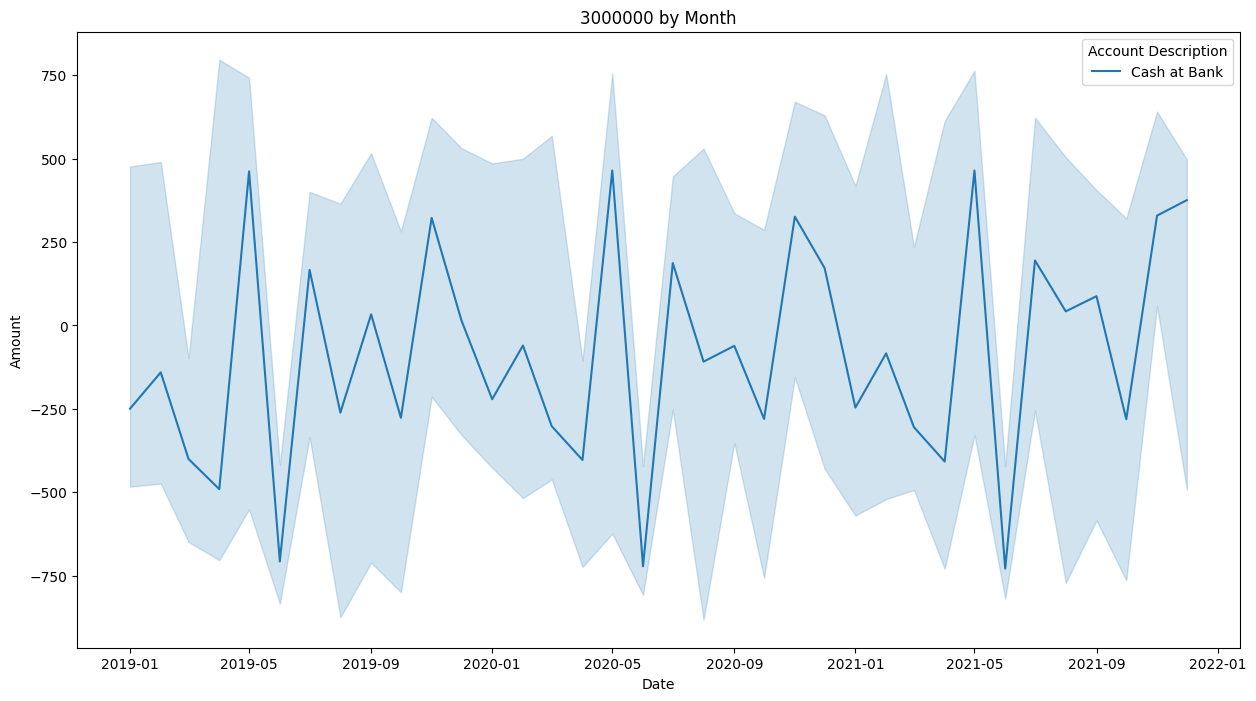

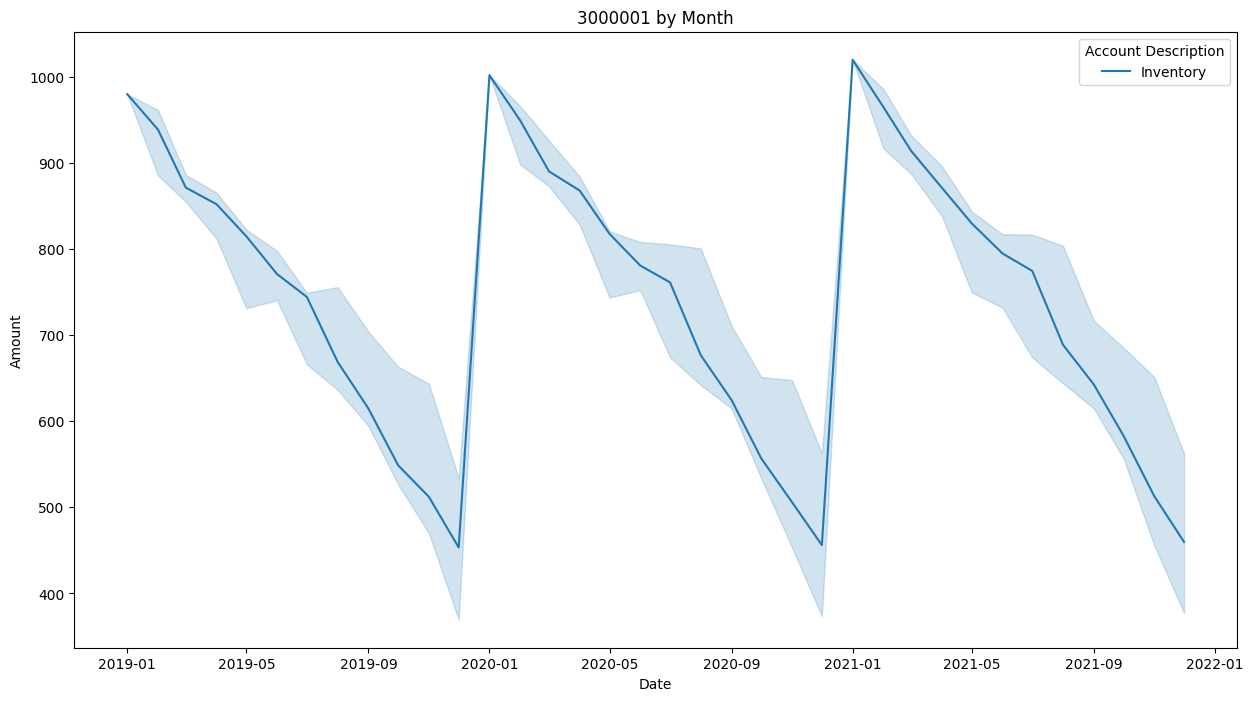

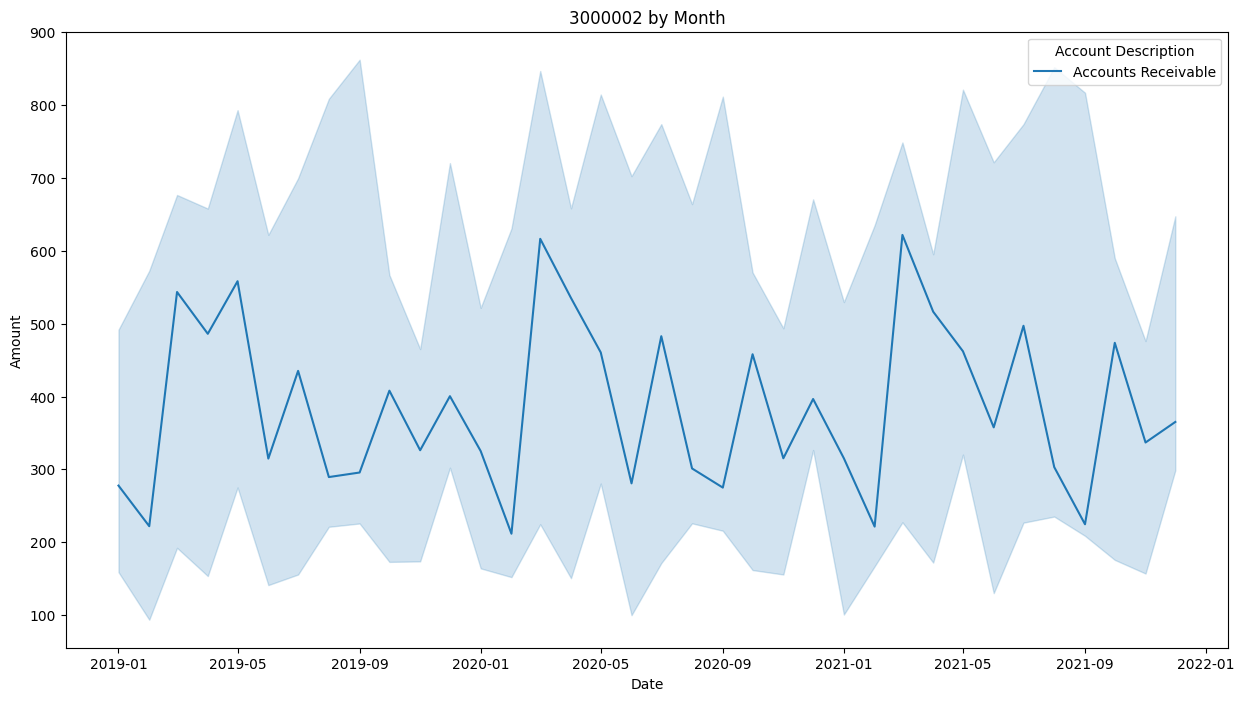

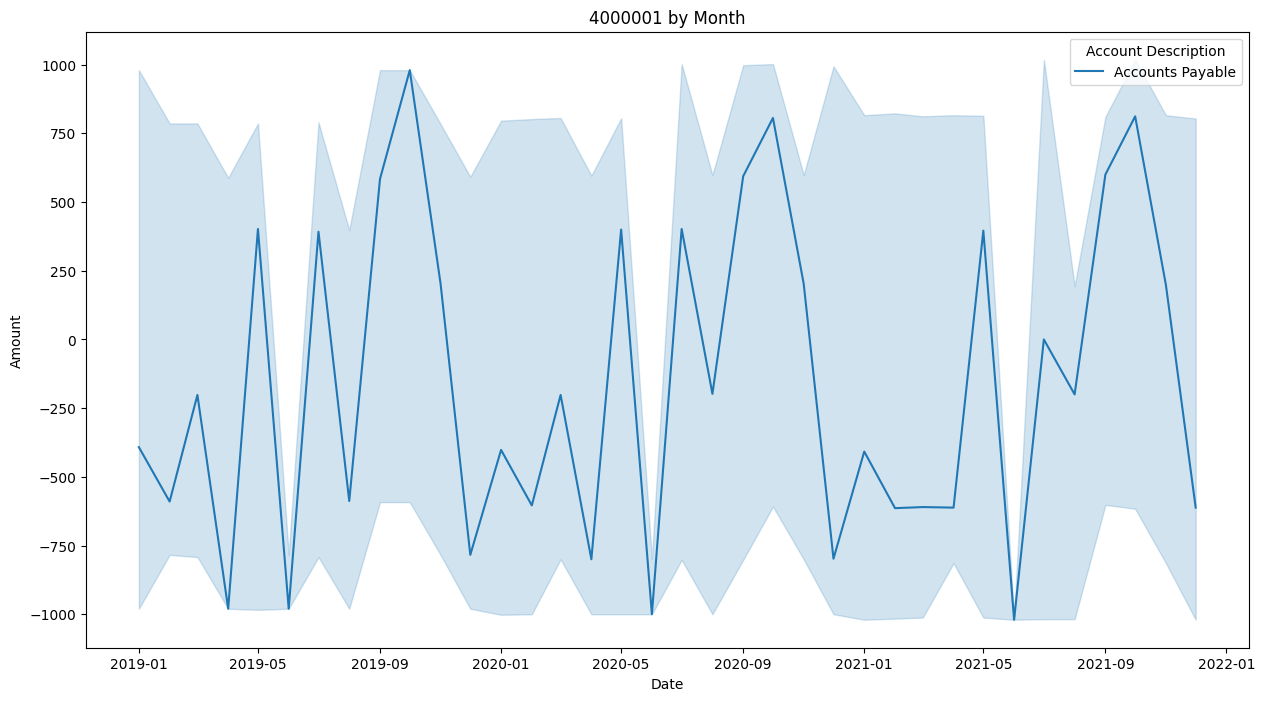

In [20]:
for account in df['Account'].unique():
    plt.figure(figsize=(15,8))
    sns.lineplot(x='Date', y='Amount', estimator=np.median, hue= 'Account Description', data = df[df['Account']==account]).set_title(f'{account} by Month')
    plt.show()
    

In [21]:
# most of the plots show similary patterns or seasonality except inventory. will filter out inventory in the example for better modeling. 

df = df[df['Account'] != 3000001]
df['Account'].unique()

array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000002, 4000001], dtype=int64)

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3888 entries, 0 to 4211
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year                 3888 non-null   int64         
 1   Month                3888 non-null   object        
 2   Cost Centre          3888 non-null   object        
 3   Account              3888 non-null   int64         
 4   Account Description  3888 non-null   object        
 5   Account Type         3888 non-null   object        
 6   Amount               3888 non-null   float64       
 7   Period               3888 non-null   object        
 8   Day                  3888 non-null   int64         
 9   Date                 3888 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 334.1+ KB


In [23]:
# changing dtypes and add context to the account/ year columns. 
df['Account'] = 'ACC' + df['Account'].astype(str)
df['Year'] = df['Year'].astype(str)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3888 entries, 0 to 4211
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year                 3888 non-null   object        
 1   Month                3888 non-null   object        
 2   Cost Centre          3888 non-null   object        
 3   Account              3888 non-null   object        
 4   Account Description  3888 non-null   object        
 5   Account Type         3888 non-null   object        
 6   Amount               3888 non-null   float64       
 7   Period               3888 non-null   object        
 8   Day                  3888 non-null   int64         
 9   Date                 3888 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 334.1+ KB


In [25]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,ACC1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01
1,2019,Jan,CC100,ACC1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01
2,2019,Jan,CC100,ACC1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01
3,2019,Jan,CC100,ACC1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01
4,2019,Jan,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-01-01


In [26]:
# these tow columsn likely hold the same relevent information

print(len(df['Account'].unique()))
print('-----------------------------------------')
print(len(df['Account Description'].unique()))

12
-----------------------------------------
12


In [27]:
# cobmine columns and validate unique values of new column to ensure no mismathces. 

df['AccountVale']  = df['Account'] + df['Account Description']
len(df['AccountVale'].unique())

12

In [28]:
# drop fields that aren't needed. 
df.drop(['Period','Day', 'Date', 'Account Description', 'AccountVale'], axis=1, inplace = True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3888 entries, 0 to 4211
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          3888 non-null   object 
 1   Month         3888 non-null   object 
 2   Cost Centre   3888 non-null   object 
 3   Account       3888 non-null   object 
 4   Account Type  3888 non-null   object 
 5   Amount        3888 non-null   float64
dtypes: float64(1), object(5)
memory usage: 212.6+ KB


In [30]:
#one hot encode the entire dataset. 
df = pd.get_dummies(df)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3888 entries, 0 to 4211
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Amount                  3888 non-null   float64
 1   Year_2019               3888 non-null   uint8  
 2   Year_2020               3888 non-null   uint8  
 3   Year_2021               3888 non-null   uint8  
 4   Month_Apr               3888 non-null   uint8  
 5   Month_Aug               3888 non-null   uint8  
 6   Month_Dec               3888 non-null   uint8  
 7   Month_Feb               3888 non-null   uint8  
 8   Month_Jan               3888 non-null   uint8  
 9   Month_Jul               3888 non-null   uint8  
 10  Month_Jun               3888 non-null   uint8  
 11  Month_Mar               3888 non-null   uint8  
 12  Month_May               3888 non-null   uint8  
 13  Month_Nov               3888 non-null   uint8  
 14  Month_Oct               3888 non-null   

## 4. Modeling
- Compare different regression models to identify the best performers for our dataset.
- Use cv grid to fine-tune the hyperparameters of the models.
- Evaluate the tuned models to select the final model for deployment.
---

In [32]:
# create target and features datasets. 

X = df.drop('Amount', axis = 1)
y = df['Amount']

In [33]:
from sklearn.model_selection import train_test_split

# create train test split for model building
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, )

(2721, 40) (1167, 40) (2721,) (1167,)


In [34]:
# import dependencies for modeling

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [35]:
# create pipelines for each regressor for looping through later. 
pipelines = {
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234))
}

In [36]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [37]:
hyper_grid = {
    'rf': {
        'randomforestregressor__min_samples_split': [2,4,6],
        'randomforestregressor__min_samples_leaf': [1,2,3],
        },
    'gb': {
        'gradientboostingregressor__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, .99]
    },
    'ridge': {
        'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, .99]
    },
    'lasso': {
        'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, .99]
    },
    'enet': {
        'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, .99]
    }
}

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [39]:
# loop through the pipelines created for each model and test the hyperparameters using Grid Search CV.

fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyper_grid[algo], cv=10, n_jobs=-1)
    try:
        print('Started training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))



Started training for rf.
rf has been successfully fit.
Started training for gb.
gb has been successfully fit.
Started training for ridge.
ridge has been successfully fit.
Started training for lasso.
lasso has been successfully fit.
Started training for enet.
enet has been successfully fit.


## 5. Evaluation
- Model performance metrics (RMSE, MAE, R^2, etc.).
- Residual analysis.
- Comparison of model performances.
- Feature importance analysis.
---

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error


In [42]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

rf scores - R2:0.8197891414943025 MAE:142.11921976006852
gb scores - R2:0.48985168340175467 MAE:263.10354134137725
ridge scores - R2:0.36130322961528205 MAE:296.5759816944058
lasso scores - R2:0.3597764955615558 MAE:296.804892767996
enet scores - R2:0.3610886530527241 MAE:296.9010224274051


In [ ]:
best_model = fit_models['rf']